# **Day 3**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

## What is a pandas DataFrame

* Pandas is a library 
    * (import it, has a documentation website https://pandas.pydata.org/)
    
* DataFrame is a datatype/datastructure/object
    * the main offering of the pandas library
    

## Why use pandas DataFrames

* Pandas DataFrame 
    * Robust tool for data wrangling and data analysis
    * Exceptionally good documentation
    * Synergizes with other Libraries
    
* Use-case/motivation
    * More convenient than numpy arrays
    * More powerful than excel
    * In-memory amount of data
    * Millions of rows 

## Clear example of DataFrame

![alt text](../img/day_3_lecture_1_image_1.png "Title")

* Attributes
    * Column Indexes
    * Row Indexes
    * Multiple datatypes
    * Datatypes function of column
        * List of strings in the entry at [4,'column_three']

## How are they made?

* They are declared
* The information comes from
    * read in a .csv file
    * from a python dictionary
    * from a pickle (special binary file)
    * from .json file
    * and more


## Making the above DataFrame

* Strategy
    * DataFrame from a python dictionary (less common, but helpful for now)

* If we were unsure
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
    
* We make a dictionary where 
    * the keys are column names
    * the values are lists of actual data

In [2]:
#make the values
first_list=[1,2,3,4,5]
second_list=['a','b','c','d','e']
third_list=['lets','mix','it','up',['ok']]

In [3]:
#assign the values to keys in a dictionary
my_dict={
    'column_one':first_list,
    'column_two':second_list,
    'column_three':third_list
}

In [4]:
#print the whole dictionary to see what it looks like
#note that the keys are ordered alphabetically when we use pprint (pretty print)
pprint(my_dict)

{'column_one': [1, 2, 3, 4, 5],
 'column_three': ['lets', 'mix', 'it', 'up', ['ok']],
 'column_two': ['a', 'b', 'c', 'd', 'e']}


In [5]:
#declare our dataframe using the "from dictionary approach"
#get our "information" from our dictionary
my_DataFrame=pd.DataFrame.from_dict(my_dict)

In [6]:
#see our dataframe
my_DataFrame

,column_one,column_two,column_three
0,1,a,lets
1,2,b,mix
2,3,c,it
3,4,d,up
4,5,e,[ok]


## Accessing Values in a DataFrame

### Accesing the Indices (indexes)

The indices are accessible and mutable (changeable)

In [7]:
print(my_DataFrame.index)


RangeIndex(start=0, stop=5, step=1)


In [8]:
print(my_DataFrame.columns)

Index(['column_one', 'column_two', 'column_three'], dtype='object')


### Accesing cells by numeric location

Values DataFrames can be accessed "like" traditional lists (according to numerical position).

This can be a mildly dangerous approach if you are writing for long-term projects. But can be convenient for some quick-scripts.

In [9]:
my_DataFrame.iloc[2,1]

'c'

### Accessing cells by index/column-names

"at" is a good choice for single-value access

In [10]:
my_DataFrame.at[2,'column_three']

'it'

"loc" is a good choice for "slicing" a dataframe
(provide a list of row-indices and a list of column-indices)

In [11]:
my_DataFrame.loc[0:2,['column_two','column_three']]

,column_two,column_three
0,a,lets
1,b,mix
2,c,it


### Accessing cells by condition

We can write conditions "inside loc" in order to get slices where the condition is true
(fyi: under the hood, python turns the condition into a list of True/False)

In [12]:
my_DataFrame.loc[
    my_DataFrame['column_one'] > 2
]

,column_one,column_two,column_three
2,3,c,it
3,4,d,up
4,5,e,[ok]


## Operations on a DF

We can loosely classify operations on a DF into "simple" and "complicated". The general strategy for each type of operation is shown below.

### Simple Operations

* Rule of thumb definition
    * If the operation feels "common", then see (google) if there is a built-in function

* Examples
    * Taking the average of a column
    * Adding a constant to a column
    * Stripping the whitespace from the ends of strings in a column

* Advice 
    * Use the built in function.
        * Fast
        * Error-free

In [13]:
#taking the average value of a column
#same thing as my_DataFrame['column_one'].mean()
my_DataFrame.column_one.mean()

3.0

In [14]:
#adding a constant value to a column
my_DataFrame.column_one+5

0     6
1     7
2     8
3     9
4    10
Name: column_one, dtype: int64

*A Caveat*

In [15]:
#notice in the above we did not assign the output of "my_DataFrame.column_one+5" to anything.
#so the original dataframe remains unchanged
my_DataFrame

,column_one,column_two,column_three
0,1,a,lets
1,2,b,mix
2,3,c,it
3,4,d,up
4,5,e,[ok]


In [16]:
#removing the whitespace from a column
my_DataFrame.column_two.str.strip()

0    a
1    b
2    c
3    d
4    e
Name: column_two, dtype: object

Notice that we needed to "access" the "string representation" of a column in order to "do an operation" that "acts on strings". With a little practice you will get used to these things.

### More Complicated Operations

* Rule of thumb definition
    * As the "customness" of an operation increases, so do the chances that you will have to write the operation yourself.

* Advice
    * If the project does not call for it, do not break your back to force the use of fast functions.
    * Instead, consider "operating" "element-wise" "in a for-loop"

* Examples
    * Each element in a column is searched against a database
    * Each list in a column has some complicated math done on it
    
One approach is iterrows

In [17]:
#iterrows gives us two things that we iterate over simultaneously, much like enumerate() on a
#"normal" list
for temporary_index,temporary_row in my_DataFrame.iterrows():
    #COMPLICATED CODE HERE
    #printing example:
    print(temporary_row['column_one']+3)

4
5
6
7
8


## Wrangling and Synergies with other libraries

### Getting a larger dataset

In [18]:
#the penguins dataset is a "classic"
my_dataset=sns.load_dataset('penguins')

In [19]:
my_dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Note that we can no longer see every row and every column. This will be especially true in datasets with thousands (of thousands) of rows. We want to be able to interrogate the dataset as a whole.

### Basic inspection - Some handy functions

In [20]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* info() shows us
    * column names
    * non-null counts
    * datatypes
    * memory usage

In [21]:
my_dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* describe() gives us some descriptive statistics of numeric columns
    * look at these values together (dont assume normality, etc)

### Visualizing our Dataset

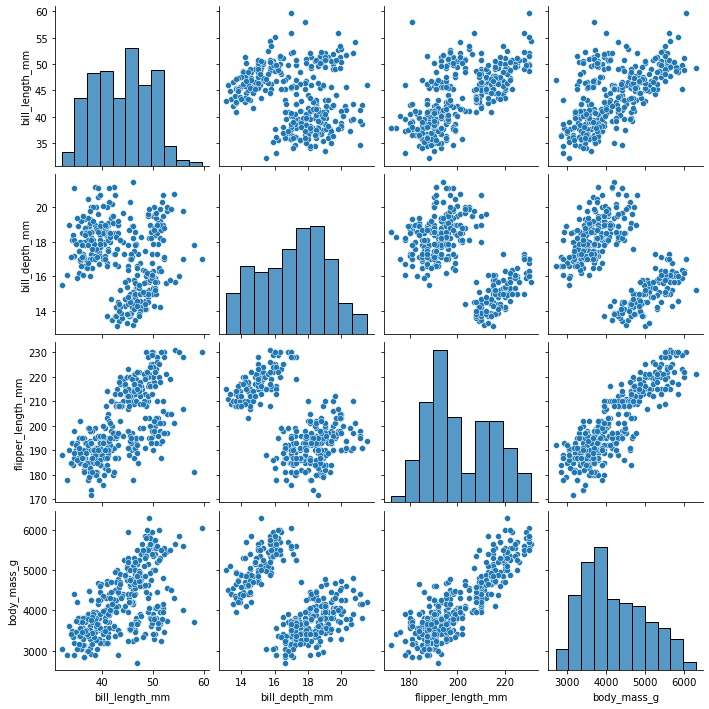

In [22]:
#seaborn's pairplot very conveniently accepts a dataframe as input 
#and makes a scatter/histogram figure
sns.pairplot(
    my_dataset
)

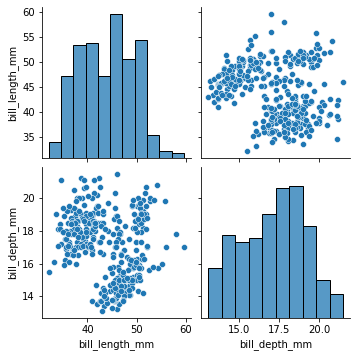

In [23]:
#we could send a smaller dataframe using a list of columns if we wanted
sns.pairplot(
    my_dataset[['bill_length_mm','bill_depth_mm']]
)

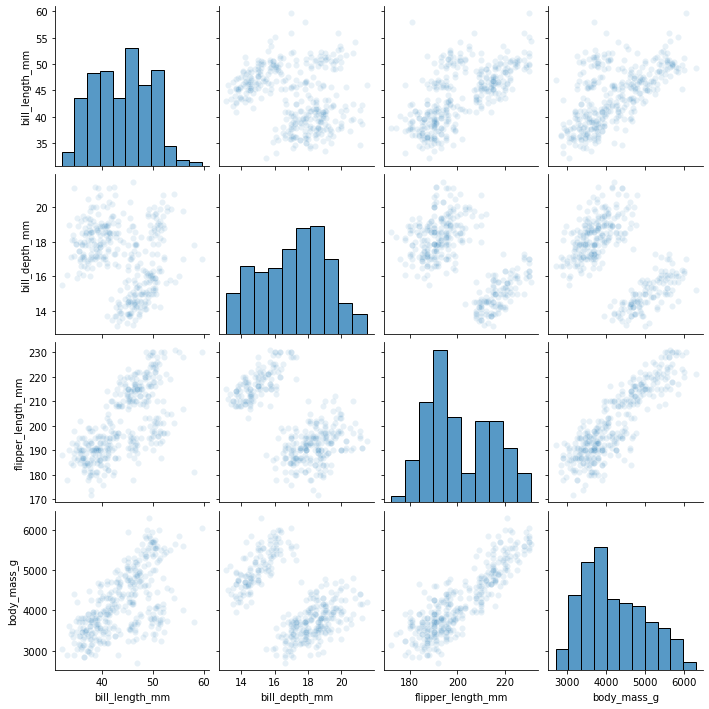

In [24]:
sns.pairplot(
    my_dataset,
    #seaborn is built "on top of matplotlib", which means that it does a lot of things
    #more easily for you
    #however, some of the stuff in matplotlib is still accessible if you can express
    #what you want the same way.
    #if we had millions of datapoints, we could visualize density by making the points
    #somewhat transparent
    plot_kws={'alpha':0.1}
)

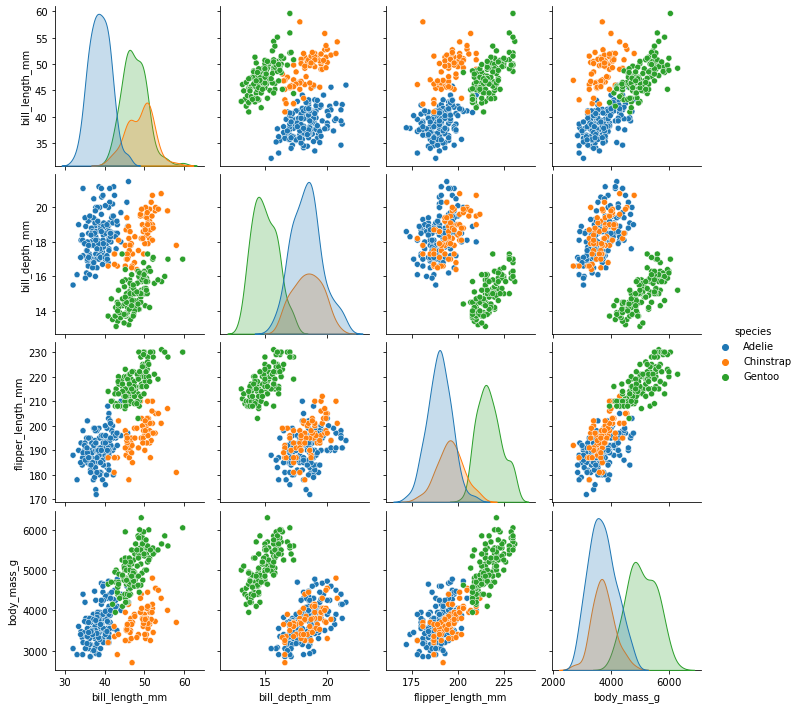

In [25]:
#coloring based on a categorical variable is very natural
sns.pairplot(
    my_dataset,
    hue='species'
)

Our histograms have been transformed into (normalized?) densities.

There are way more types of plots where that came from 

<AxesSubplot:xlabel='bill_depth_mm'>

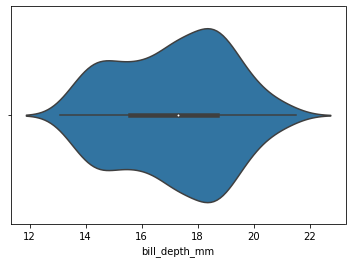

In [26]:
sns.violinplot(
    x=my_dataset.bill_depth_mm
)

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

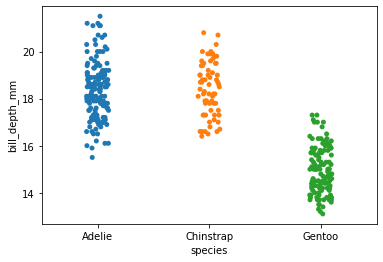

In [27]:
sns.stripplot(
    x='species',
    y='bill_depth_mm',
    data=my_dataset
)